In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

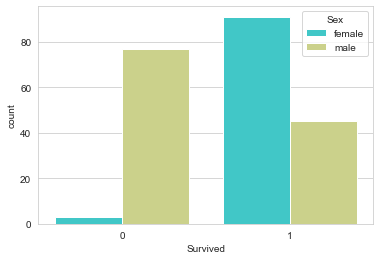

In [7]:
edadf = df[['Pclass', 'Survived','Age','Sex']]
pclass1 = edadf[edadf.Pclass == 1]
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=pclass1,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

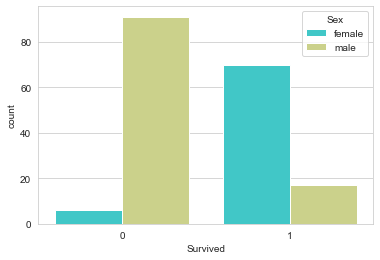

In [8]:
pclass1 = edadf[edadf.Pclass == 2]
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=pclass1,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

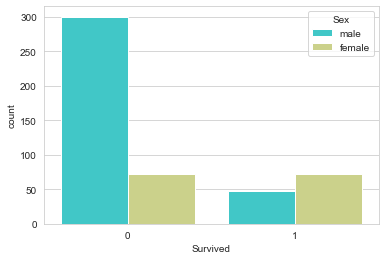

In [9]:
pclass1 = edadf[edadf.Pclass == 3]
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=pclass1,palette='rainbow')

In [17]:
pclass1 = edadf[(edadf.Sex == 'Male') & (edadf.Survived == 1)]
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=pclass1,palette='rainbow')

ValueError: min() arg is an empty sequence

(array([[424.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 16.,  17., 100.,  95.,  74.,  50.,  35.,  18.,  13.,   6.]]),
 array([ 0. ,  7.4, 14.8, 22.2, 29.6, 37. , 44.4, 51.8, 59.2, 66.6, 74. ]),
 <a list of 2 BarContainer objects>)

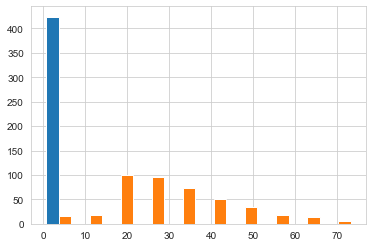

In [16]:
agedf = edadf[(edadf.Age.notna() ) & (edadf.Survived == 0)]
agedf = agedf[['Survived','Age']]
plt.hist(agedf)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

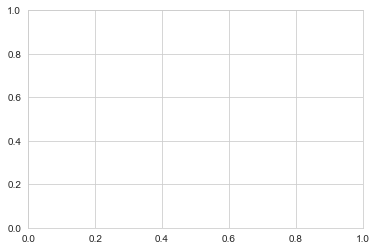

In [20]:
labels = edadf[['Pclass']]
men = edadf[(edadf.Age >= 15) & (edadf.Sex == 'male')]
women = edadf[(edadf.Age >= 15) & (edadf.Sex == 'female')]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, men, width, label='Men')
rects2 = ax.bar(x, women, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Survival')
ax.set_title('Survival by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [43]:
eda_adult = df[df.Age >= 15].groupby(['Pclass','Sex']).agg({'Survived':'sum'}).reset_index()
edapivot = eda_adult.pivot_table(index='Pclass', columns='Sex', aggfunc=sum).reset_index()
edapivot
#classplot = edadf.plot(x="Survived", y=["Pclass", "Sex"], kind="bar", rot=0)

Pclass Survived     
Sex          female male
0        1       81   37
1        2       58    6
2        3       34   29

ValueError: shape mismatch: objects cannot be broadcast to a single shape

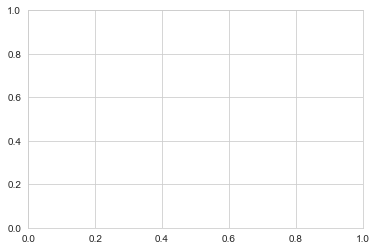

In [44]:

width = 0.4
fig, ax = plt.subplots()
ax.bar(x=edapivot['Pclass'], height=edapivot['Survived'], width=width)
